In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["axes.linewidth"] =  1.5
mpl.rcParams["axes.grid"] = False

mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.spines.left"] = True
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.top"] = True
mpl.rcParams["axes.spines.right"] = True

mpl.rcParams["xtick.major.width"] = 1.5
mpl.rcParams["ytick.major.width"] = 1.5
mpl.rcParams["ytick.minor.visible"] = True
mpl.rcParams["xtick.minor.visible"] = True
mpl.rcParams["xtick.minor.width"] = 1.0
mpl.rcParams["ytick.minor.width"] = 1.0
mpl.rcParams["xtick.minor.size"] =  2.5
mpl.rcParams["ytick.minor.size"] =  2.5
mpl.rcParams["xtick.direction"] =  'in'
mpl.rcParams["ytick.direction"] =  'in'
mpl.rcParams["xtick.major.size"] =  5
mpl.rcParams["ytick.major.size"] =  5

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.weight'] ='bold'
mpl.rcParams['font.size'] = 12.0
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams["figure.dpi"] = 600
mpl.rcParams['figure.figsize'] = (6.5, 3.5)



sols = ["meoh-9", "wat-39"]
zeos = ["pureSi", "t9", "st9"]
temps = ["323", "373", "423", "473"]


def set_ticks(ax, xlinear=False, ylinear=False, xmax=True, ymax=True, yticks = 5, xticks = 5):
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
    if xlinear: ax.xaxis.set_major_locator(mpl.ticker.LinearLocator(xticks))
    if xmax: ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(xticks))
    if ylinear: ax.yaxis.set_major_locator(mpl.ticker.LinearLocator(yticks))
    if ymax: ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(yticks))

def save_figure(fig, prefix):
    for suffix in ['eps', 'pdf', 'png', 'tiff']:
        fig.savefig(f'{suffix}/{prefix}.{suffix}')



In [2]:

def get_distribution_over_time(prefix):
    print(prefix)
    molecules_in_pores = {
        "100 Active A": np.load(f"{prefix}/100_lower_left.npy"),
        "100 Active B": np.load(f"{prefix}/100_lower_right.npy"), 
    
        "010 Active A": np.load(f"{prefix}/010_lower_left.npy"),
        "010 Active B": np.load(f"{prefix}/010_upper_left.npy"), 
    
        "100 Silica A": np.load(f"{prefix}/100_upper_left.npy"),
        "100 Silica B": np.load(f"{prefix}/100_upper_right.npy"),
    
        "010 Silica A": np.load(f"{prefix}/010_lower_right.npy"),
        "010 Silica B": np.load(f"{prefix}/010_upper_right.npy"),    
    }

    nframes = len(molecules_in_pores["100 Active A"])
    distribution_over_time = np.zeros((nframes, 4)) # 100 Active, 010 Active, 100 Silica, 010 Silica 

    for frame in range(nframes):
        if frame % 20000 == 0: print(f"Processing frame {frame} / {nframes}")
        distribution_over_time[frame][0] = molecules_in_pores["100 Silica A"][frame].sum() +  molecules_in_pores["100 Silica B"][frame].sum()
        distribution_over_time[frame][1] = molecules_in_pores["100 Active A"][frame].sum() +  molecules_in_pores["100 Active B"][frame].sum()
        distribution_over_time[frame][2] = molecules_in_pores["010 Silica A"][frame].sum() +  molecules_in_pores["010 Silica B"][frame].sum()
        distribution_over_time[frame][3] = molecules_in_pores["010 Active A"][frame].sum() +  molecules_in_pores["010 Active B"][frame].sum()
        
    return distribution_over_time 
    

In [3]:
results = {"meoh-9": {
    "pureSi": {"323": [], "373": [], "423": [], "473": []}, 
    "t9": {"323": [], "373": [], "423": [], "473": []}, 
    "st9": {"323": [], "373": [], "423": [], "473": []}
    },
    "wat-39": {
    "pureSi": {"323": [], "373": [], "423": [], "473": []}, 
    "t9": {"323": [], "373": [], "423": [], "473": []}, 
    "st9": {"323": [], "373": [], "423": [], "473": []}
    }
} 





In [4]:
s = "meoh-9"
z = "pureSi"
t = "373"
for s in sols:
    for z in zeos:
        results[s][z][t] = get_distribution_over_time(f"../{s}/{z}/{t}/pore-location-distribution")





../meoh-9/pureSi/373/pore-location-distribution
Processing frame 0 / 225001
Processing frame 20000 / 225001
Processing frame 40000 / 225001
Processing frame 60000 / 225001
Processing frame 80000 / 225001
Processing frame 100000 / 225001
Processing frame 120000 / 225001
Processing frame 140000 / 225001
Processing frame 160000 / 225001
Processing frame 180000 / 225001
Processing frame 200000 / 225001
Processing frame 220000 / 225001
../meoh-9/t9/373/pore-location-distribution
Processing frame 0 / 225001
Processing frame 20000 / 225001
Processing frame 40000 / 225001
Processing frame 60000 / 225001
Processing frame 80000 / 225001
Processing frame 100000 / 225001
Processing frame 120000 / 225001
Processing frame 140000 / 225001
Processing frame 160000 / 225001
Processing frame 180000 / 225001
Processing frame 200000 / 225001
Processing frame 220000 / 225001
../meoh-9/st9/373/pore-location-distribution
Processing frame 0 / 225001
Processing frame 20000 / 225001
Processing frame 40000 / 2250

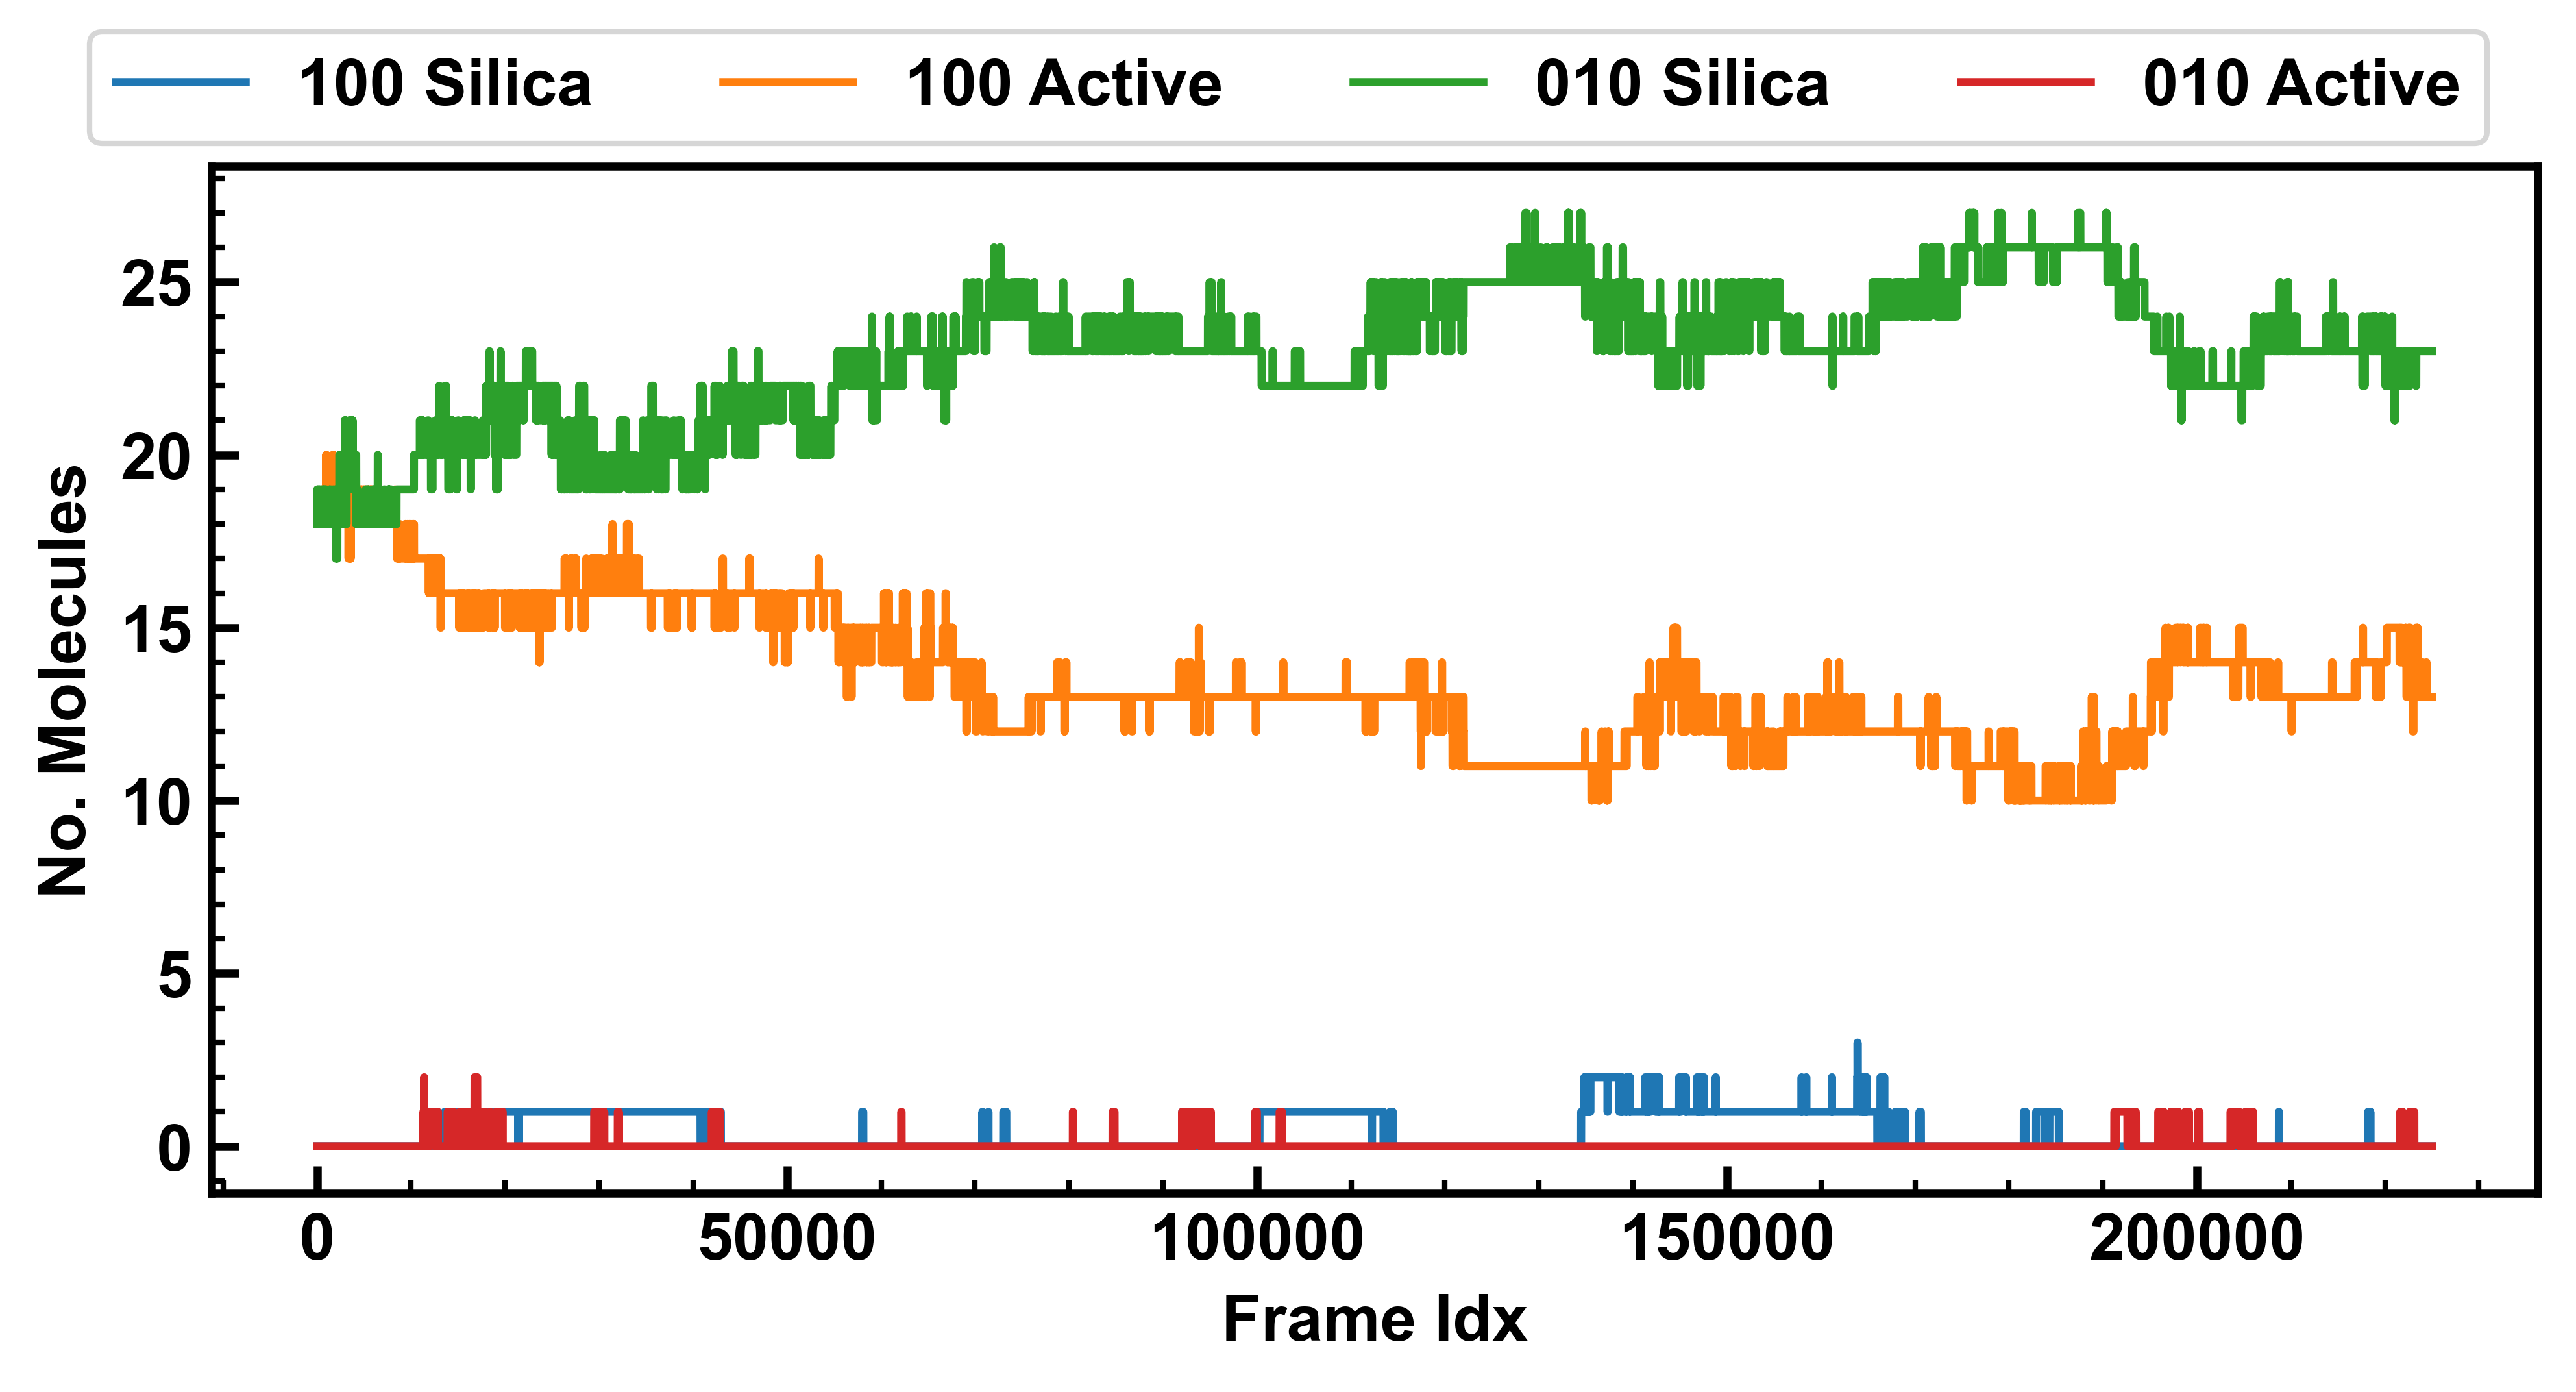

In [78]:

fig, axs = plt.subplots(
    nrows = 1, ncols = 1, 
    figsize=(6.5, 3.5), dpi=600, 
    sharex = False, sharey = False, 
    layout="constrained"
    )



s = "meoh-9"
z = "pureSi"
t = "373"
axs.plot(results[s][z][t])
fig.legend(ncols = 4, loc = "outside upper center", labels = ["100 Silica", "100 Active", "010 Silica" , "010 Active"])

axs.set_ylabel("No. Molecules")
axs.set_xlabel("Frame Idx")
pass


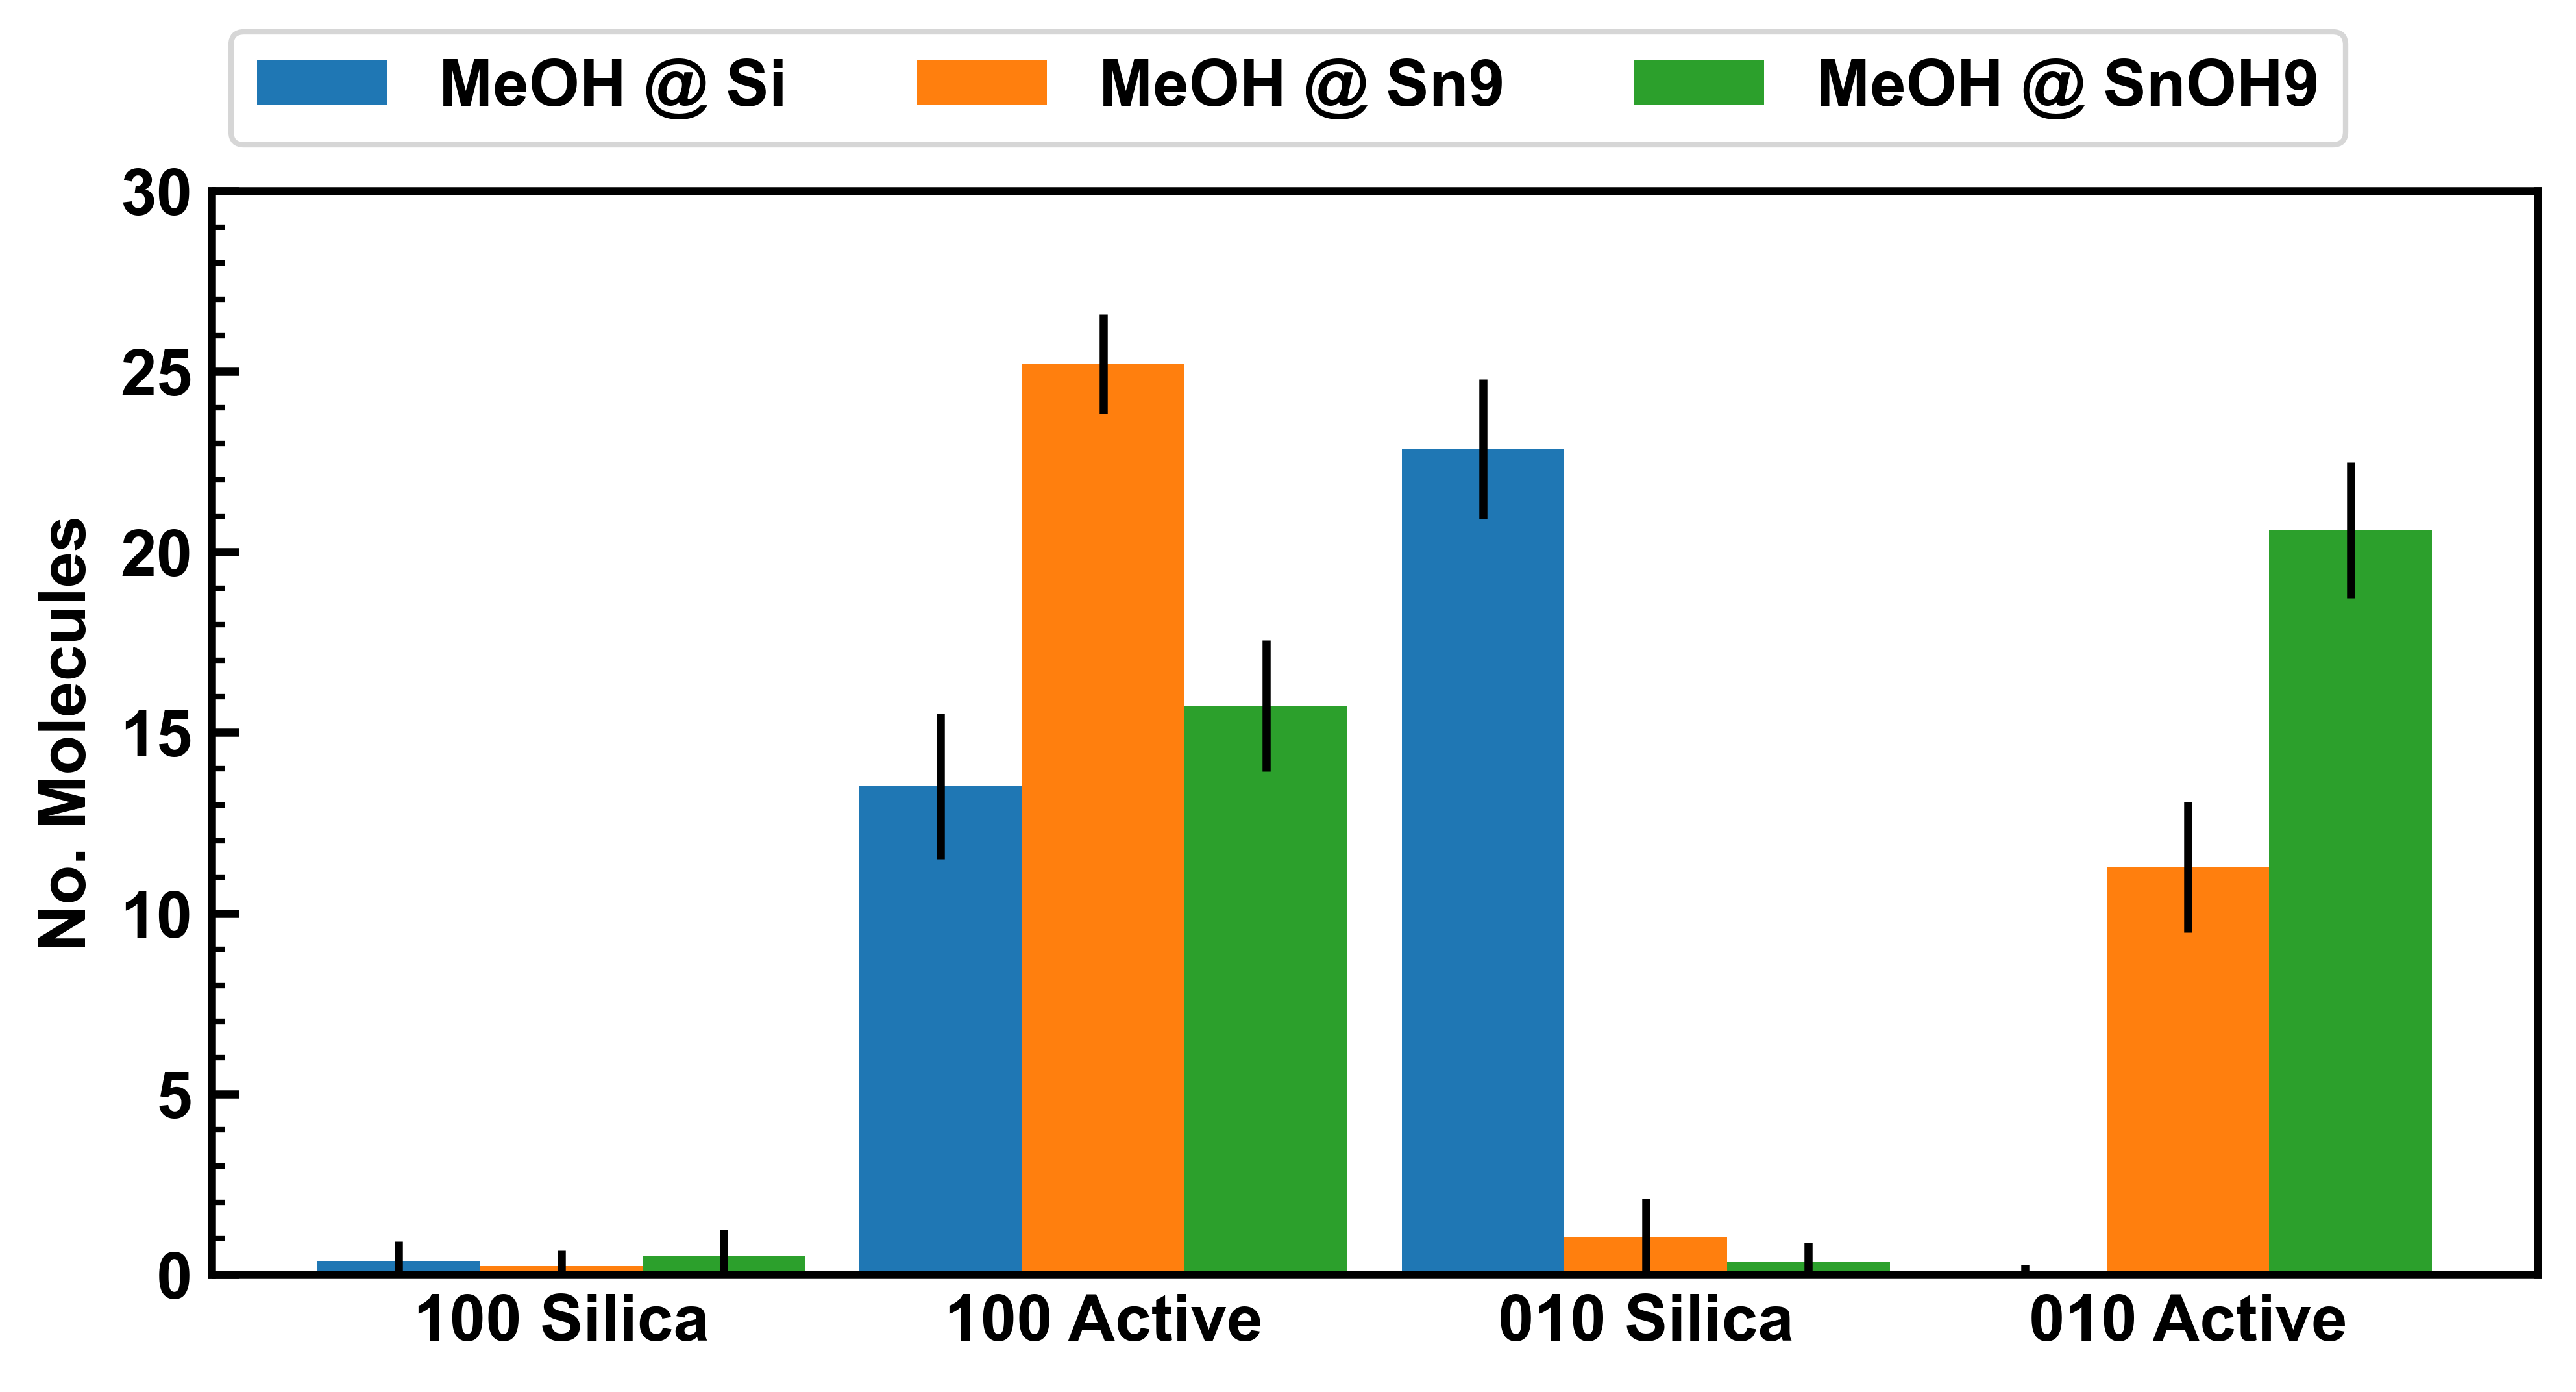

In [79]:

fig, axs = plt.subplots(
    nrows = 1, ncols = 1, 
    figsize=(6.5, 3.5), dpi=600, 
    sharex = False, sharey = False, 
    layout="constrained"
    )
labels =  ["100 Silica", "100 Active", "010 Silica" , "010 Active"]



x = np.arange(len(labels))  # the label locations
w = 0.3

def plot_bar(x, distribution_over_time, label, width = 0.3):
    means = distribution_over_time.mean(axis = 0)
    std =  distribution_over_time.std(axis = 0)
    rects = axs.bar(x, means, width, yerr = std, label = label)
    return rects



s = "meoh-9"
z = "pureSi"
t = "373"
plot_bar(x - w, results[s][z][t], label = "MeOH @ Si", width = w)


s = "meoh-9"
z = "t9"
t = "373"
plot_bar(x, results[s][z][t], label = "MeOH @ Sn9", width = w)


s = "meoh-9"
z = "st9"
t = "373"
plot_bar(x + w, results[s][z][t], label = "MeOH @ SnOH9", width = w)

# Add some text for labels, title and custom x-axis tick labels, etc.

axs.set_ylabel('No. Molecules')
axs.set_xticks(x)
axs.set_xticklabels(labels)

axs.tick_params(axis='x', which='both', length=0)
axs.set_ylim((0, 30))
fig.legend(ncols = 3, loc = "outside upper center")
pass


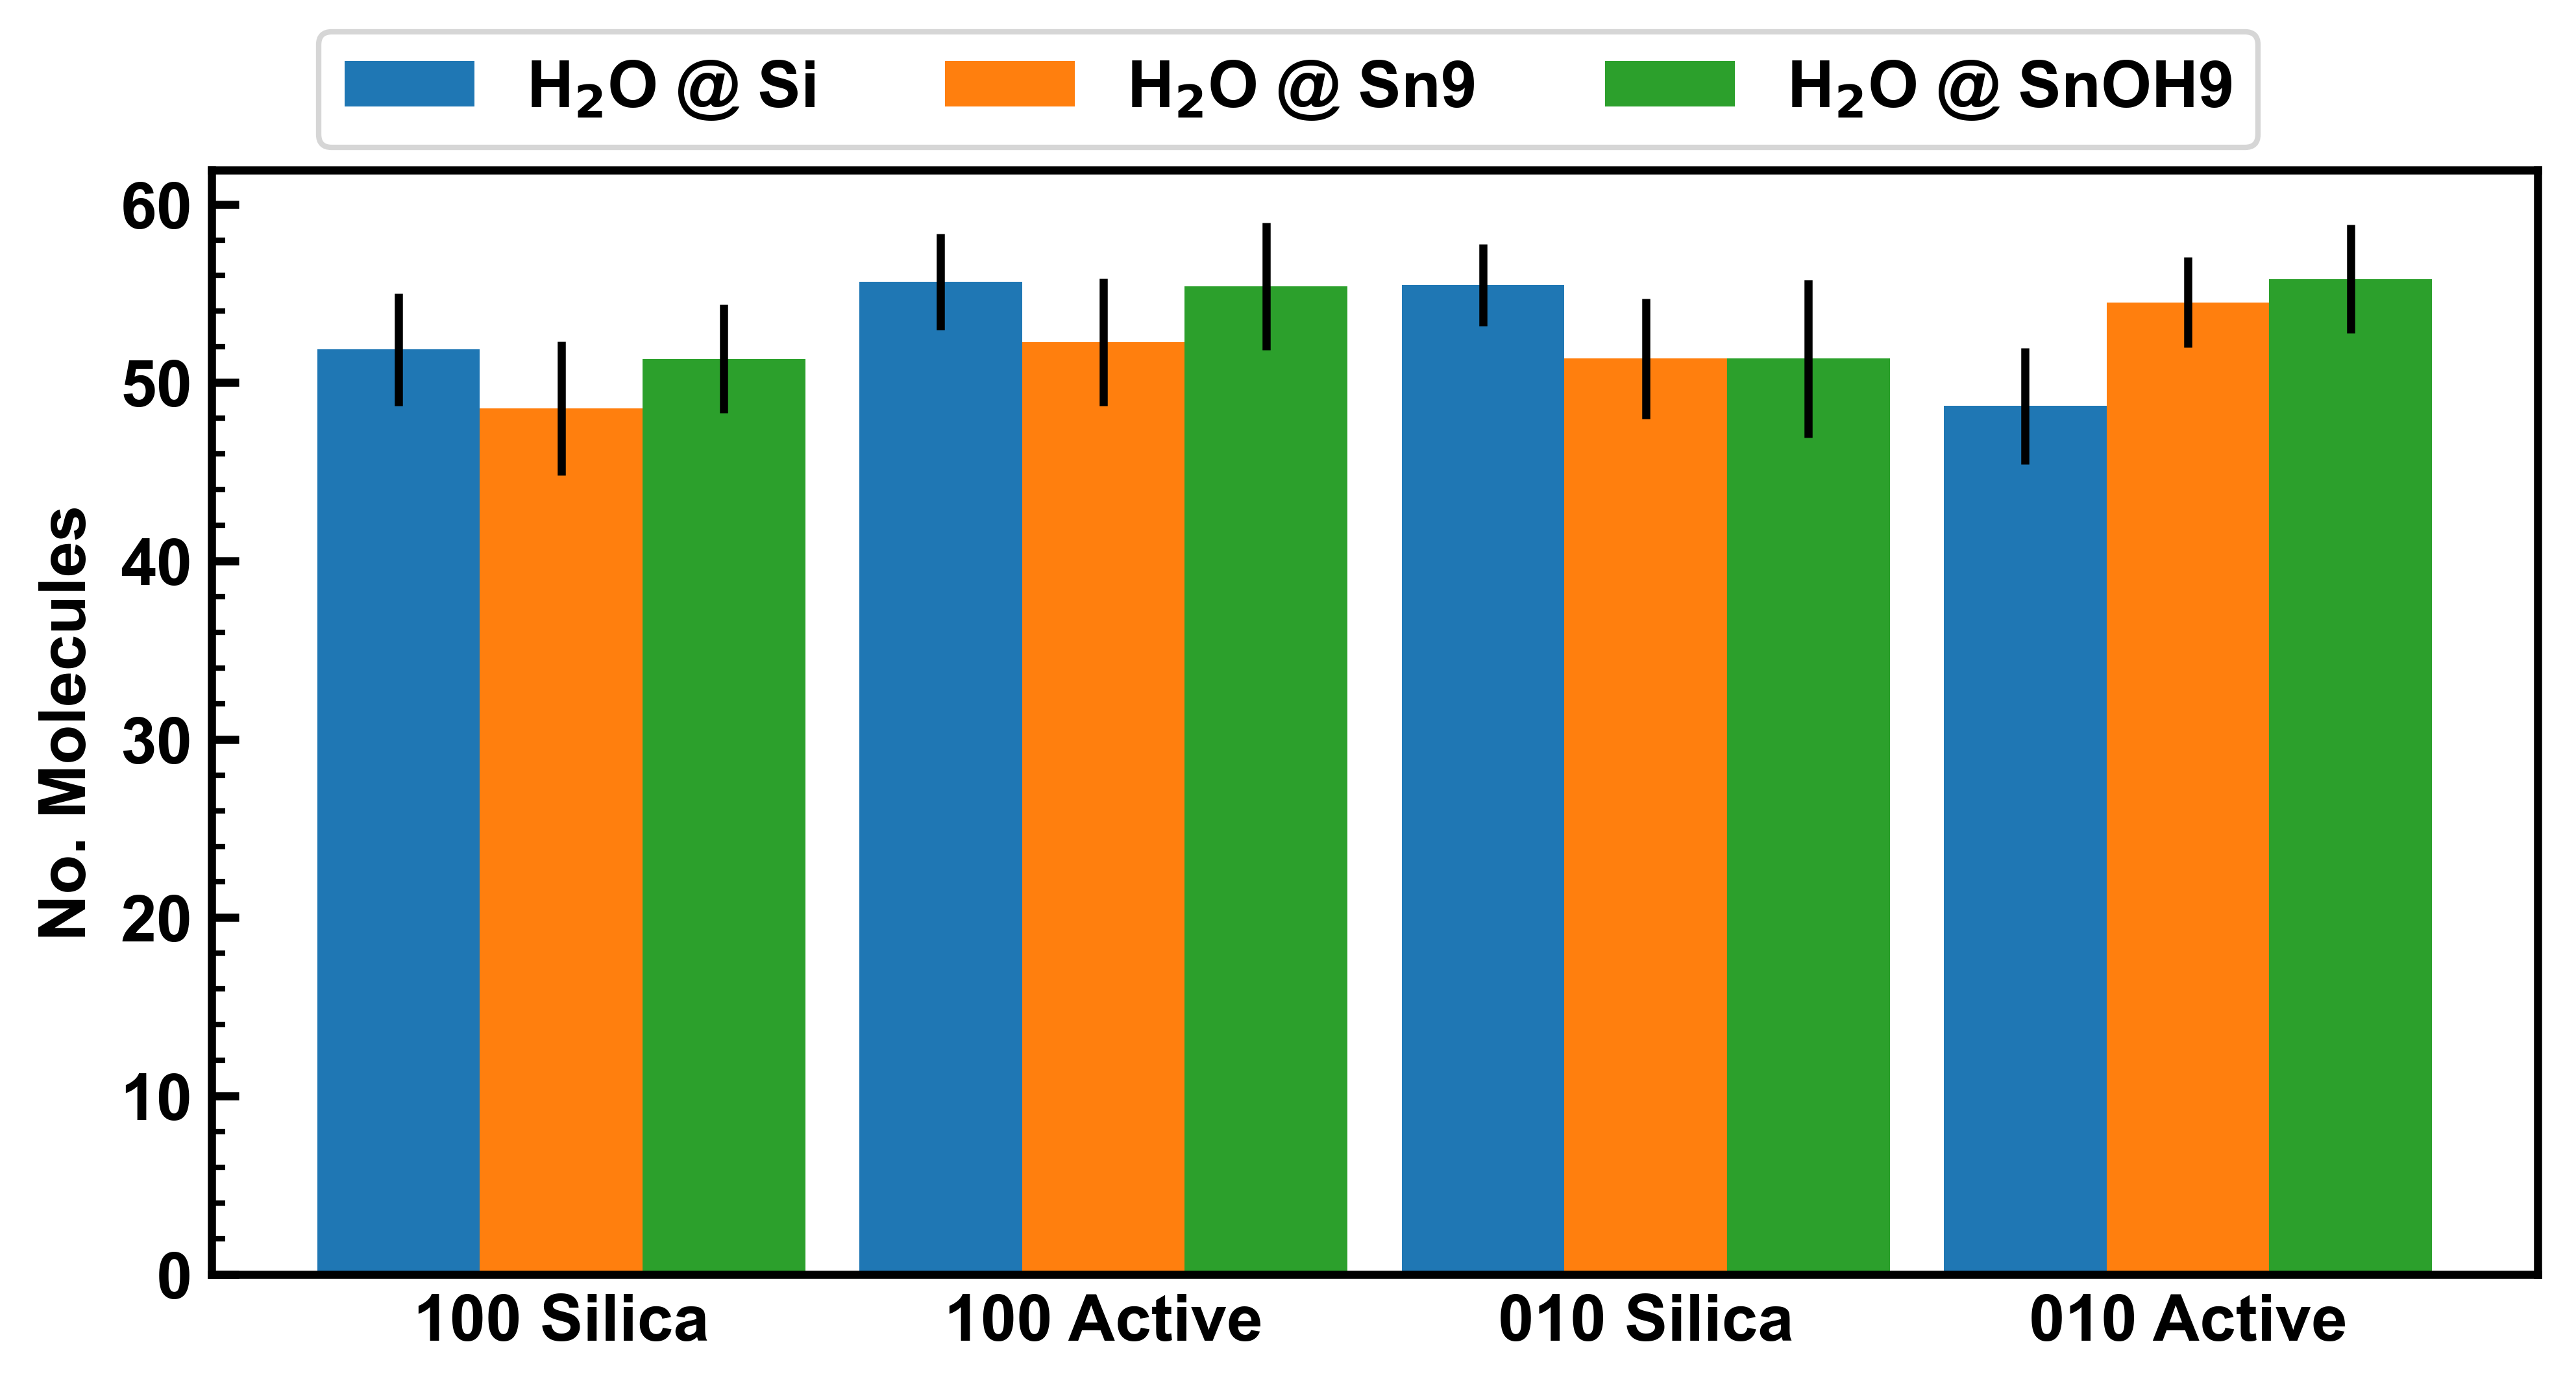

In [82]:

fig, axs = plt.subplots(
    nrows = 1, ncols = 1, 
    figsize=(6.5, 3.5), dpi=600, 
    sharex = False, sharey = False, 
    layout="constrained"
    )
labels =  ["100 Silica", "100 Active", "010 Silica" , "010 Active"]



x = np.arange(len(labels))  # the label locations
w = 0.3

def plot_bar(x, distribution_over_time, label, width = 0.3):
    means = distribution_over_time.mean(axis = 0)
    std =  distribution_over_time.std(axis = 0)
    rects = axs.bar(x, means, width, yerr = std, label = label)
    return rects



s = "wat-39"
z = "pureSi"
t = "373"
plot_bar(x - w, results[s][z][t], label = "H$_2$O @ Si", width = w)


s = "wat-39"
z = "t9"
t = "373"
plot_bar(x, results[s][z][t], label = "H$_2$O @ Sn9", width = w)


s = "wat-39"
z = "st9"
t = "373"
plot_bar(x + w, results[s][z][t], label = "H$_2$O @ SnOH9", width = w)

# Add some text for labels, title and custom x-axis tick labels, etc.

axs.set_ylabel('No. Molecules')
axs.set_xticks(x)
axs.set_xticklabels(labels)

axs.tick_params(axis='x', which='both', length=0)
#axs.set_ylim((0, 30))
fig.legend(ncols = 3, loc = "outside upper center")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


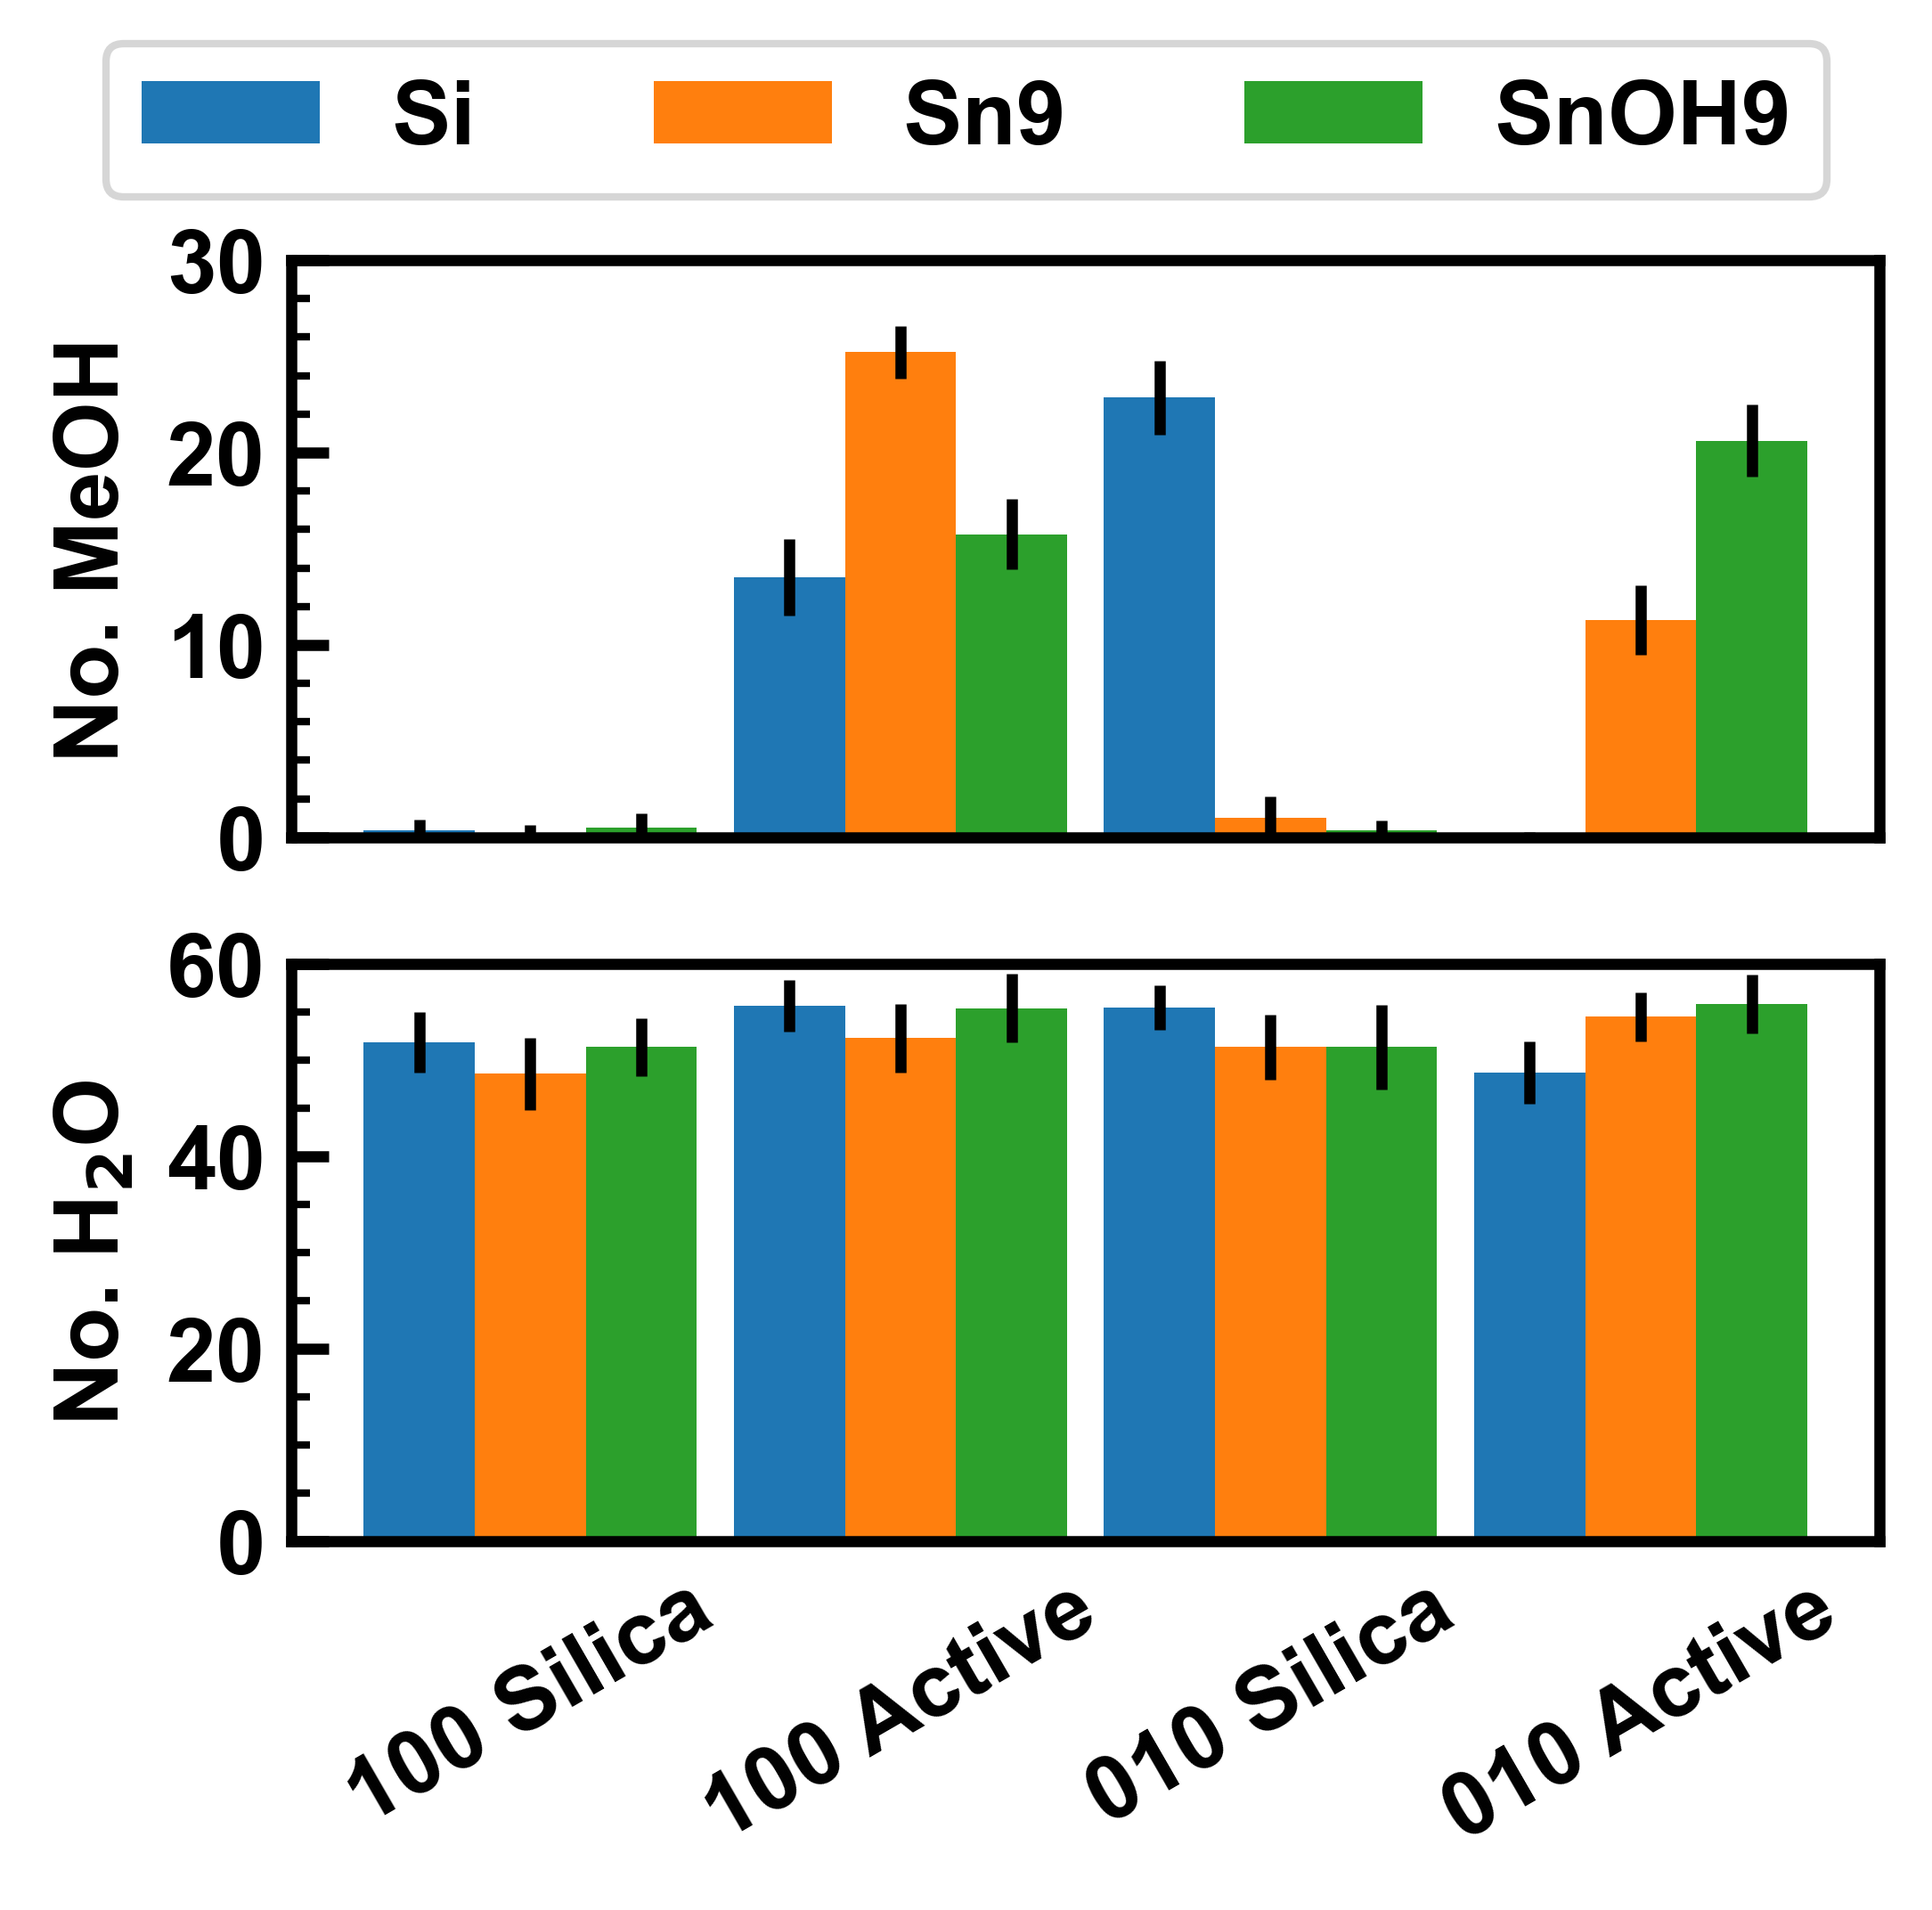

In [9]:

fig, axs = plt.subplot_mosaic(
    [["a)"], ["b)"]], 
    figsize=(3.5, 3.5), dpi=600, 
    sharex = True, sharey = False, 
    layout="constrained"
    )

labels =  ["100 Silica", "100 Active", "010 Silica" , "010 Active"]



x = np.arange(len(labels))  # the label locations
w = 0.3

def plot_bar(ax, x, distribution_over_time, label, width = 0.3):
    means = distribution_over_time.mean(axis = 0)
    std =  distribution_over_time.std(axis = 0)
    rects = ax.bar(x, means, width, yerr = std, label = label)
    return rects






s = "meoh-9"
z = "pureSi"
t = "373"
plot_bar(axs["a)"], x - w, results[s][z][t], label = "Si", width = w)


s = "meoh-9"
z = "t9"
t = "373"
plot_bar(axs["a)"], x, results[s][z][t], label = "Sn9", width = w)


s = "meoh-9"
z = "st9"
t = "373"
plot_bar(axs["a)"], x + w, results[s][z][t], label = "SnOH9", width = w)



s = "wat-39"
z = "pureSi"
t = "373"
plot_bar(axs["b)"], x - w, results[s][z][t], label = None, width = w)


s = "wat-39"
z = "t9"
t = "373"
plot_bar(axs["b)"], x, results[s][z][t], label =None, width = w)


s = "wat-39"
z = "st9"
t = "373"
plot_bar(axs["b)"], x + w, results[s][z][t], label = None, width = w)

# Add some text for labels, title and custom x-axis tick labels, etc.




axs["a)"].set_ylabel('No. MeOH')
axs["b)"].set_ylabel('No. H$_2$O')


axs["b)"].set_xticks(x)
axs["b)"].set_xticklabels(labels, rotation = 30)
axs["a)"].tick_params(axis='x', which='both', length=0)
axs["b)"].tick_params(axis='x', which='both', length=0)

axs["a)"].set_ylim((0, 30))
axs["b)"].set_ylim((0, 60))

fig.legend(ncols = 3, loc = "outside upper center")

save_figure(fig, "pore-distribution")

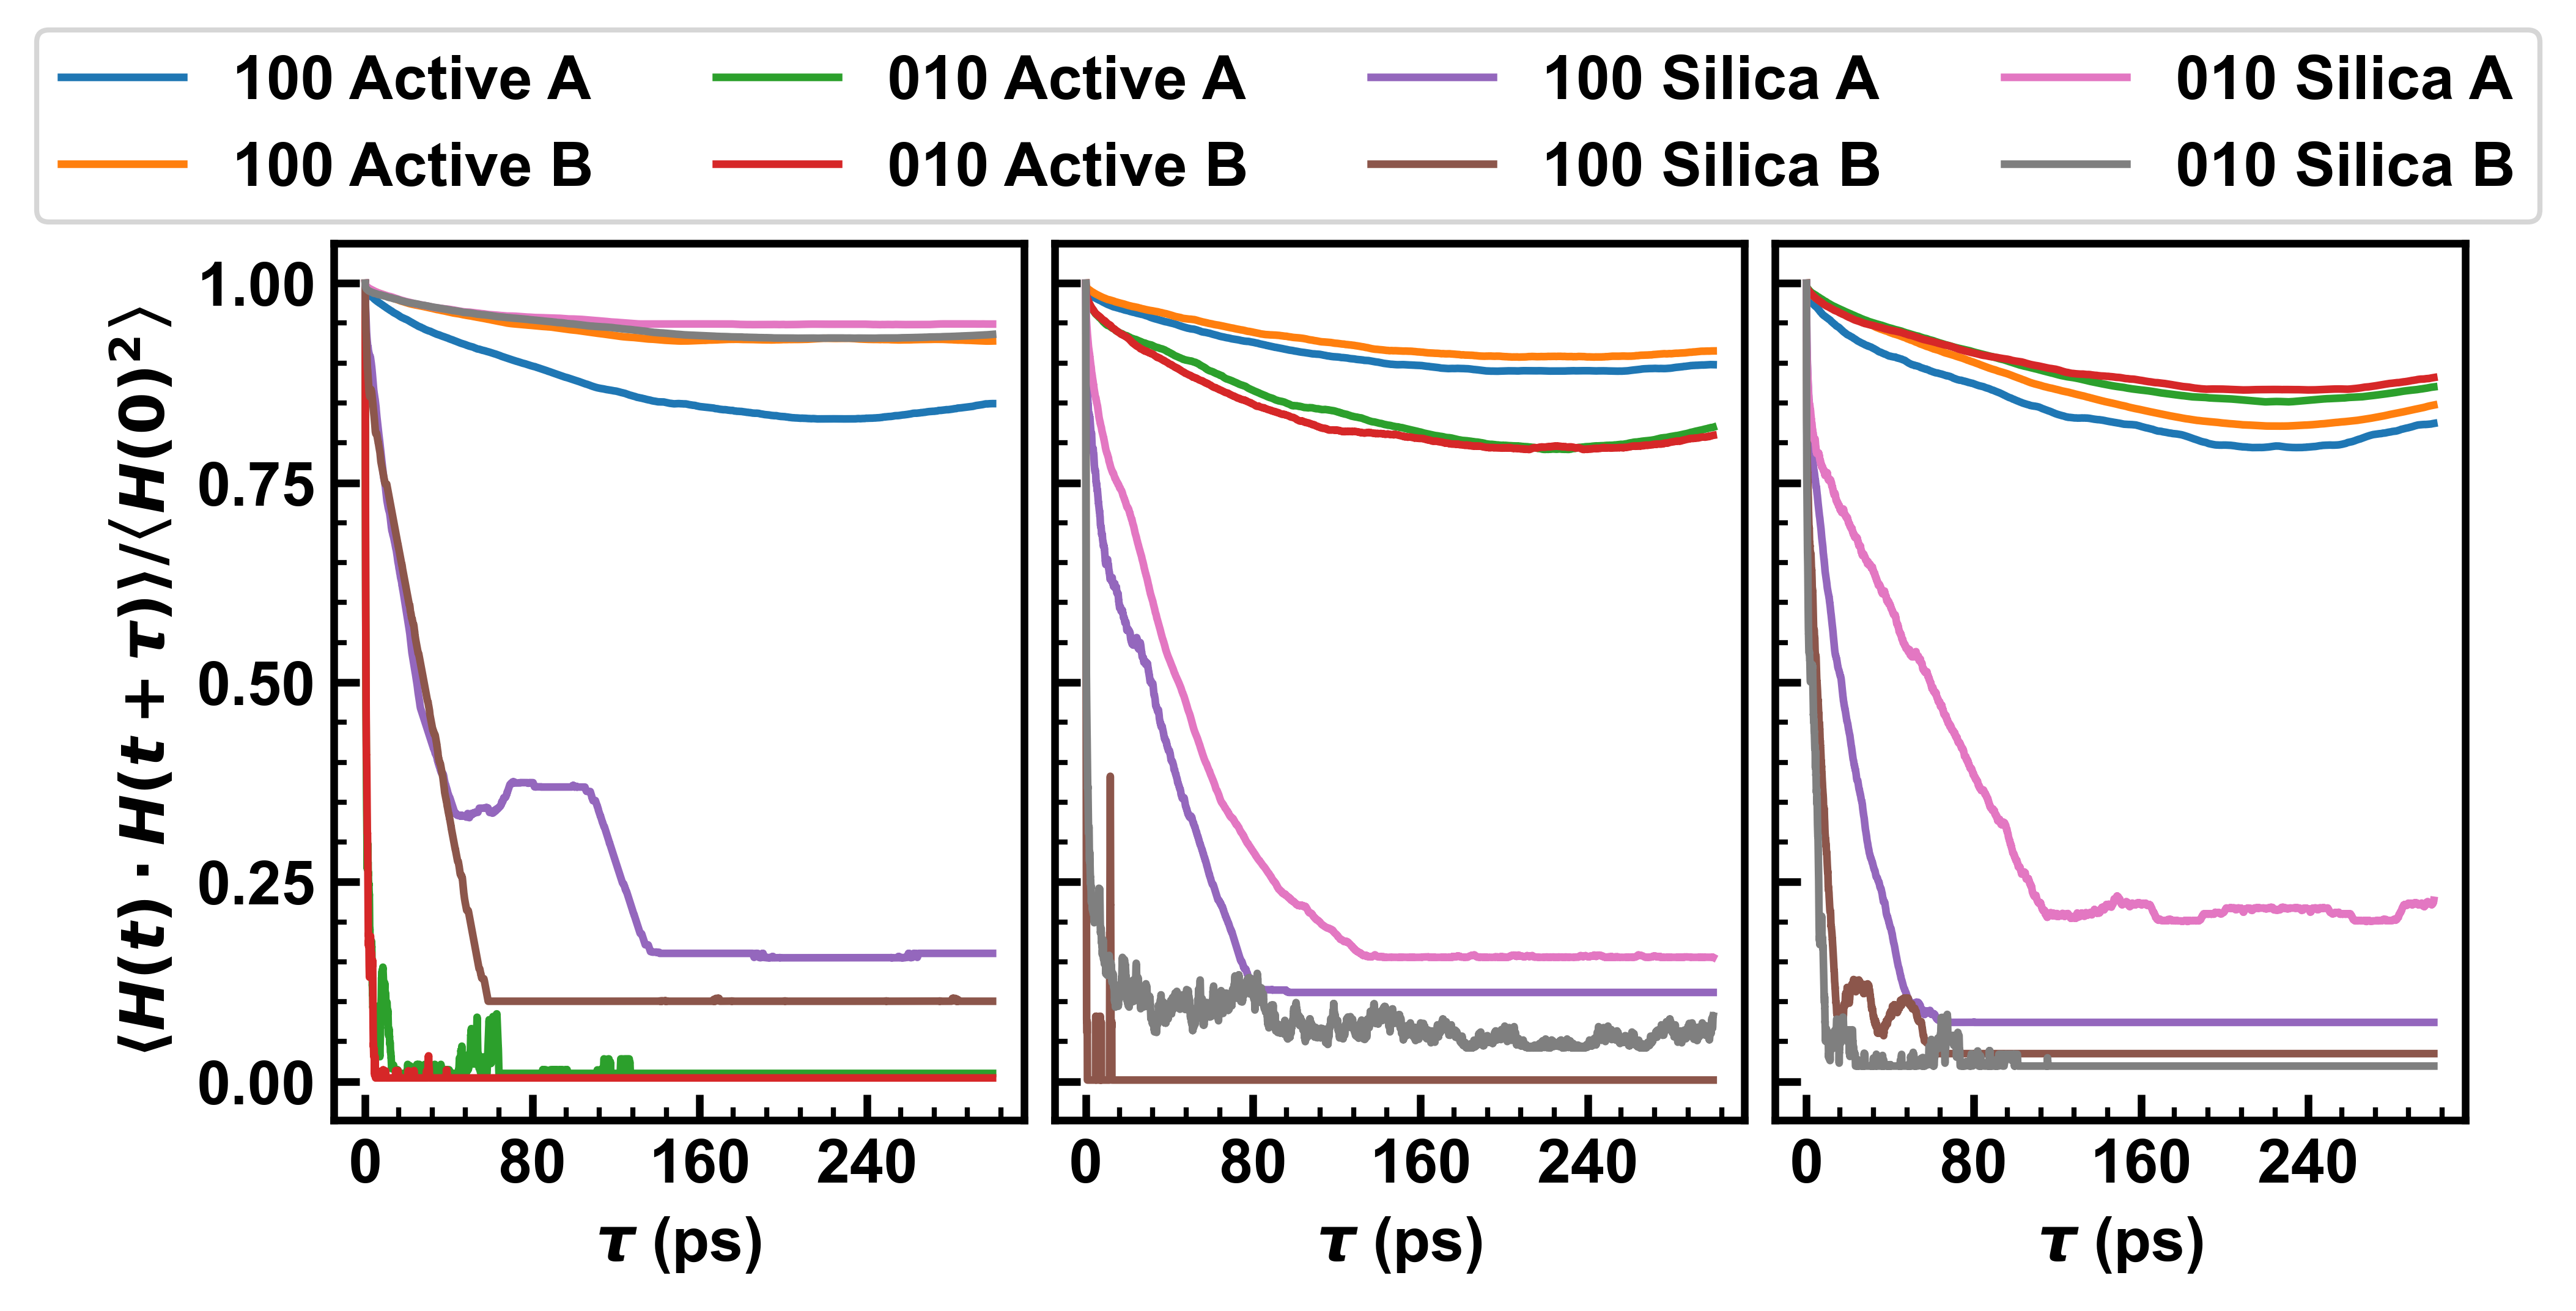

In [83]:
fig, axs = plt.subplots(
    nrows = 1, ncols = 3, 
    figsize=(6.5, 3.5), dpi=600, 
    sharex = False, sharey = True, 
    layout="constrained"
    )

def plot_acf(ax, prefix, pore, label = None):
    tau = np.load(f"{prefix}/tau.npy")
    acf = np.load(f"{prefix}/acf.{pore}.npy")
    ax.plot(tau, acf.real / acf.real[0], label = label)

pores = [
    "100_lower_left", "100_lower_right", "010_lower_left", "010_upper_left",
    "100_upper_left", "100_upper_right", "010_lower_right", "010_upper_right"   
]

plot_acf(axs[0], "../meoh-9/pureSi/373/pore-location-distribution", pores[0], label = "100 Active A")
plot_acf(axs[0], "../meoh-9/pureSi/373/pore-location-distribution", pores[1], label = "100 Active B")
plot_acf(axs[0], "../meoh-9/pureSi/373/pore-location-distribution", pores[2], label = "010 Active A")
plot_acf(axs[0], "../meoh-9/pureSi/373/pore-location-distribution", pores[3], label = "010 Active B")
plot_acf(axs[0], "../meoh-9/pureSi/373/pore-location-distribution", pores[4], label = "100 Silica A")
plot_acf(axs[0], "../meoh-9/pureSi/373/pore-location-distribution", pores[5], label = "100 Silica B")
plot_acf(axs[0], "../meoh-9/pureSi/373/pore-location-distribution", pores[6], label = "010 Silica A")
plot_acf(axs[0], "../meoh-9/pureSi/373/pore-location-distribution", pores[7], label = "010 Silica B")

plot_acf(axs[1], "../meoh-9/t9/373/pore-location-distribution", pores[0])
plot_acf(axs[1], "../meoh-9/t9/373/pore-location-distribution", pores[1])
plot_acf(axs[1], "../meoh-9/t9/373/pore-location-distribution", pores[2])
plot_acf(axs[1], "../meoh-9/t9/373/pore-location-distribution", pores[3])
plot_acf(axs[1], "../meoh-9/t9/373/pore-location-distribution", pores[4])
plot_acf(axs[1], "../meoh-9/t9/373/pore-location-distribution", pores[5])
plot_acf(axs[1], "../meoh-9/t9/373/pore-location-distribution", pores[6])
plot_acf(axs[1], "../meoh-9/t9/373/pore-location-distribution", pores[7])

plot_acf(axs[2], "../meoh-9/st9/373/pore-location-distribution", pores[0])
plot_acf(axs[2], "../meoh-9/st9/373/pore-location-distribution", pores[1])
plot_acf(axs[2], "../meoh-9/st9/373/pore-location-distribution", pores[2])
plot_acf(axs[2], "../meoh-9/st9/373/pore-location-distribution", pores[3])
plot_acf(axs[2], "../meoh-9/st9/373/pore-location-distribution", pores[4])
plot_acf(axs[2], "../meoh-9/st9/373/pore-location-distribution", pores[5])
plot_acf(axs[2], "../meoh-9/st9/373/pore-location-distribution", pores[6])
plot_acf(axs[2], "../meoh-9/st9/373/pore-location-distribution", pores[7])

axs[0].set_ylabel(r"$ \left < H(t) \cdot H(t + \tau) \right> /  \left < H(0)^2 \right> $")
axs[0].set_xlabel(r"$\tau$ (ps)")
axs[1].set_xlabel(r"$\tau$ (ps)")
axs[2].set_xlabel(r"$\tau$ (ps)")

for ax in axs:
    set_ticks(ax)

fig.legend(ncols = 4, loc = "outside upper center")

pass

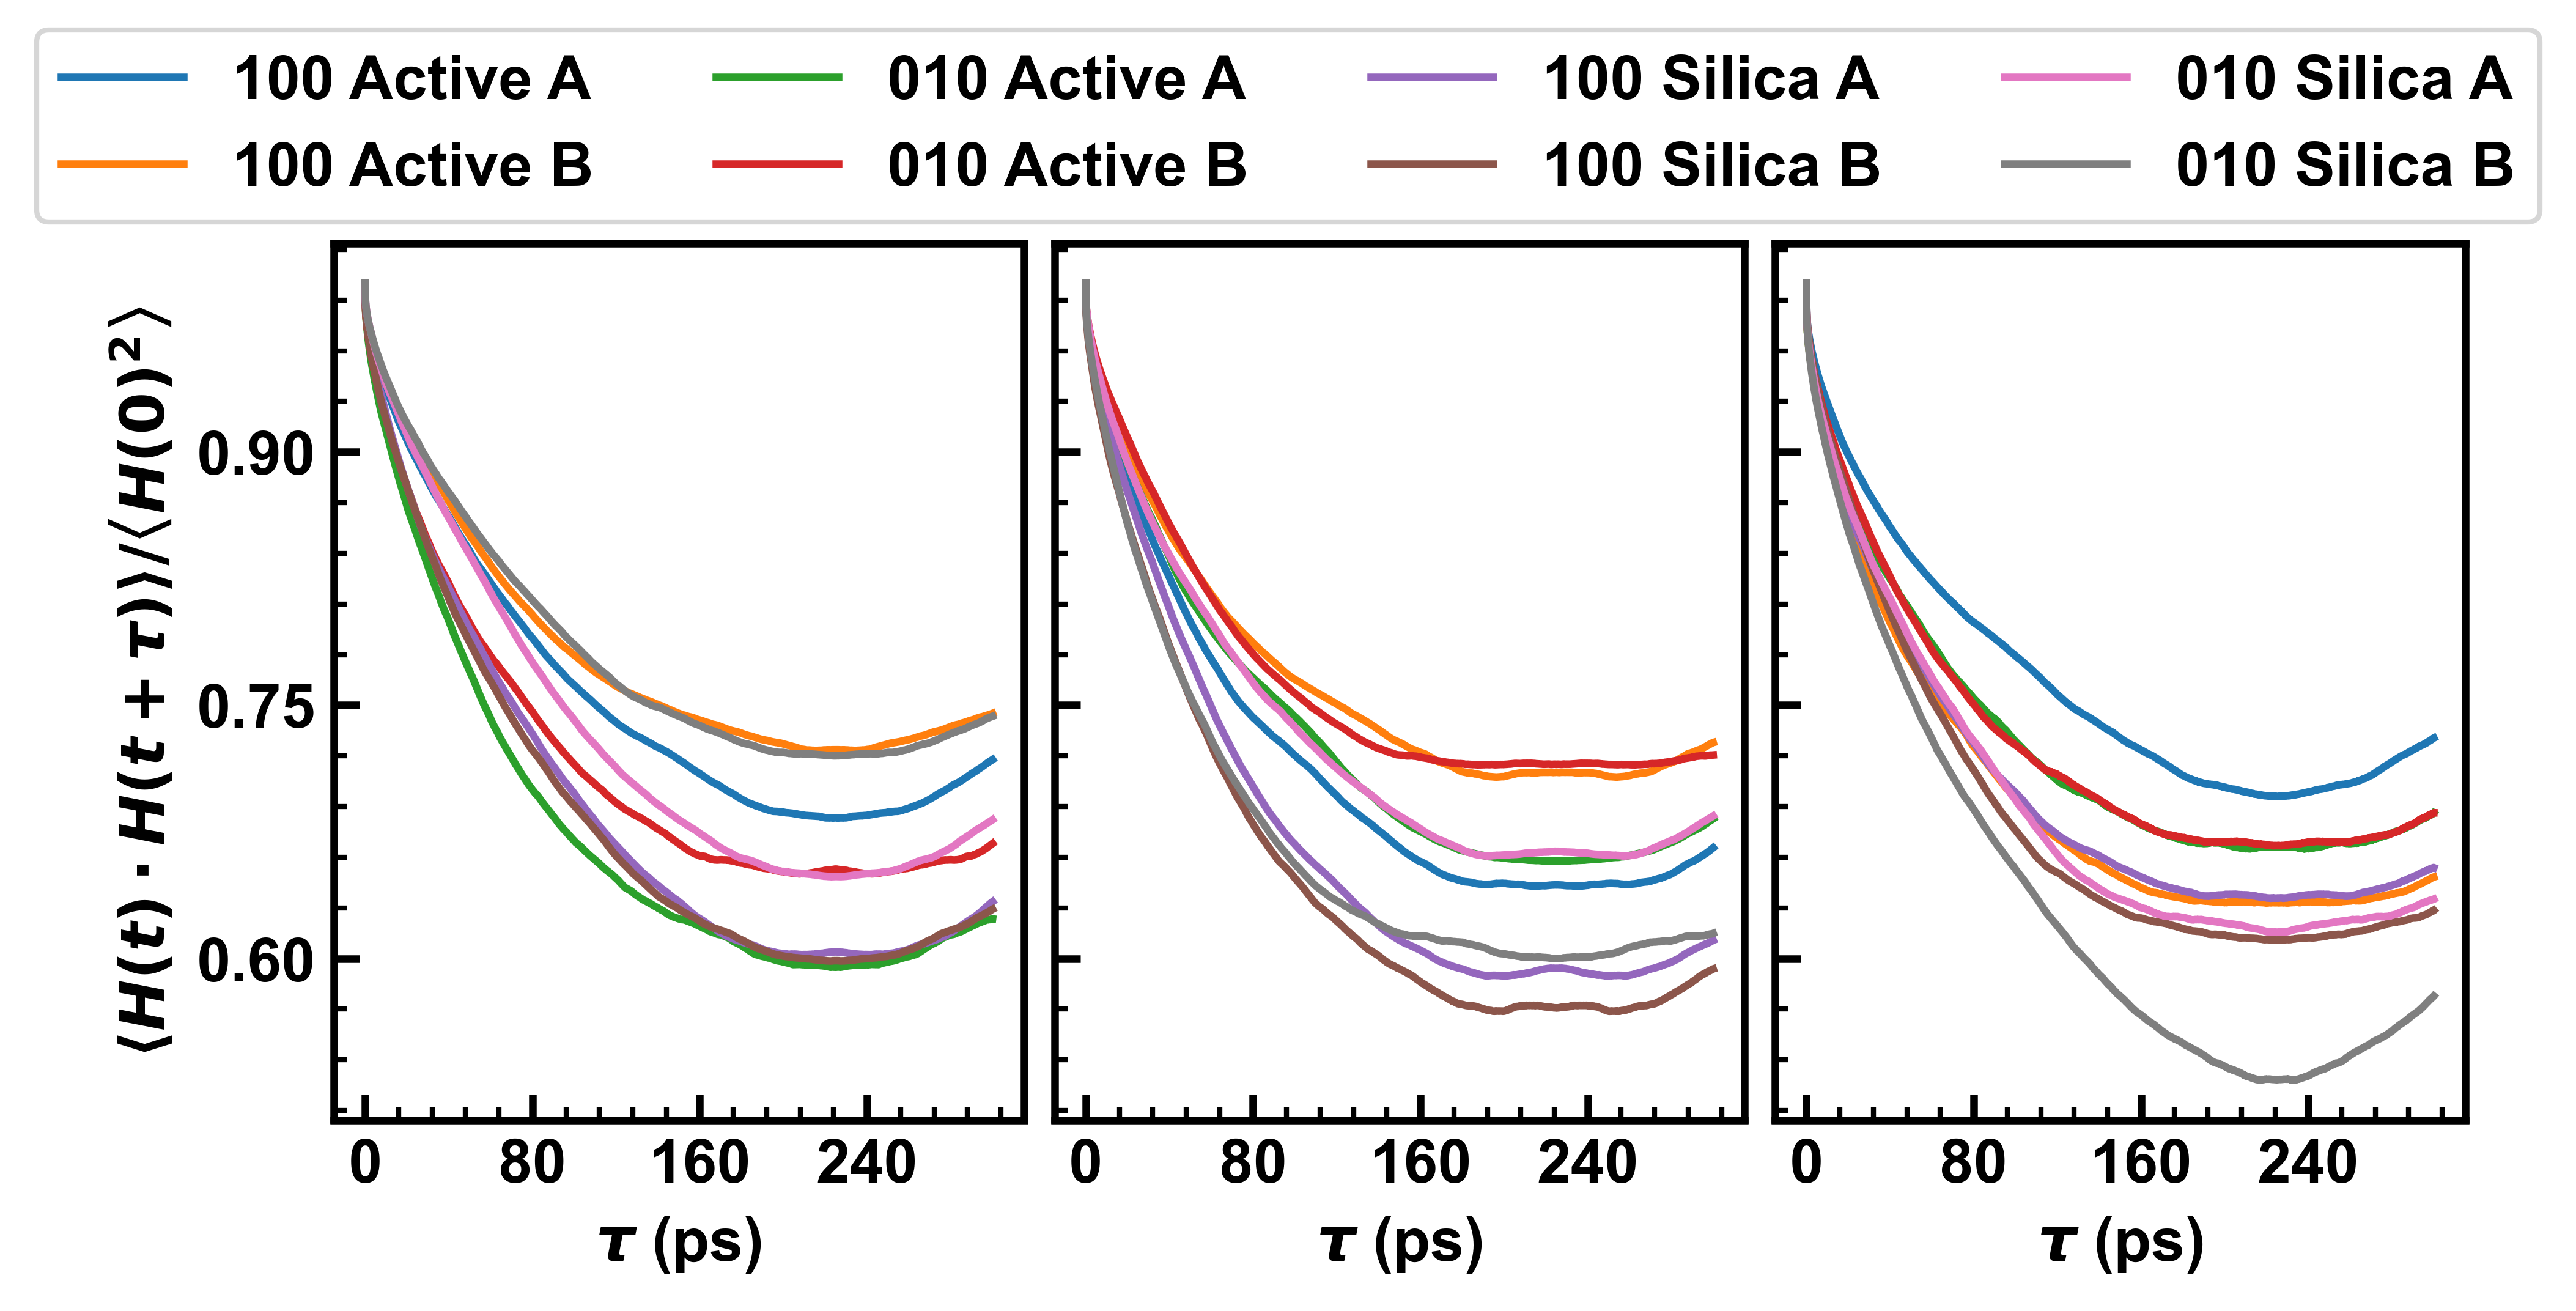

In [85]:
fig, axs = plt.subplots(
    nrows = 1, ncols = 3, 
    figsize=(6.5, 3.5), dpi=600, 
    sharex = False, sharey = True, 
    layout="constrained"
    )

def plot_acf(ax, prefix, pore, label = None):
    tau = np.load(f"{prefix}/tau.npy")
    acf = np.load(f"{prefix}/acf.{pore}.npy")
    ax.plot(tau, acf.real / acf.real[0], label = label)

pores = [
    "100_lower_left", "100_lower_right", "010_lower_left", "010_upper_left",
    "100_upper_left", "100_upper_right", "010_lower_right", "010_upper_right"   
]

plot_acf(axs[0], "../wat-39/pureSi/373/pore-location-distribution", pores[0], label = "100 Active A")
plot_acf(axs[0], "../wat-39/pureSi/373/pore-location-distribution", pores[1], label = "100 Active B")
plot_acf(axs[0], "../wat-39/pureSi/373/pore-location-distribution", pores[2], label = "010 Active A")
plot_acf(axs[0], "../wat-39/pureSi/373/pore-location-distribution", pores[3], label = "010 Active B")
plot_acf(axs[0], "../wat-39/pureSi/373/pore-location-distribution", pores[4], label = "100 Silica A")
plot_acf(axs[0], "../wat-39/pureSi/373/pore-location-distribution", pores[5], label = "100 Silica B")
plot_acf(axs[0], "../wat-39/pureSi/373/pore-location-distribution", pores[6], label = "010 Silica A")
plot_acf(axs[0], "../wat-39/pureSi/373/pore-location-distribution", pores[7], label = "010 Silica B")


plot_acf(axs[1], "../wat-39/t9/373/pore-location-distribution", pores[0])
plot_acf(axs[1], "../wat-39/t9/373/pore-location-distribution", pores[1])
plot_acf(axs[1], "../wat-39/t9/373/pore-location-distribution", pores[2])
plot_acf(axs[1], "../wat-39/t9/373/pore-location-distribution", pores[3])
plot_acf(axs[1], "../wat-39/t9/373/pore-location-distribution", pores[4])
plot_acf(axs[1], "../wat-39/t9/373/pore-location-distribution", pores[5])
plot_acf(axs[1], "../wat-39/t9/373/pore-location-distribution", pores[6])
plot_acf(axs[1], "../wat-39/t9/373/pore-location-distribution", pores[7])

plot_acf(axs[2], "../wat-39/st9/373/pore-location-distribution", pores[0])
plot_acf(axs[2], "../wat-39/st9/373/pore-location-distribution", pores[1])
plot_acf(axs[2], "../wat-39/st9/373/pore-location-distribution", pores[2])
plot_acf(axs[2], "../wat-39/st9/373/pore-location-distribution", pores[3])
plot_acf(axs[2], "../wat-39/st9/373/pore-location-distribution", pores[4])
plot_acf(axs[2], "../wat-39/st9/373/pore-location-distribution", pores[5])
plot_acf(axs[2], "../wat-39/st9/373/pore-location-distribution", pores[6])
plot_acf(axs[2], "../wat-39/st9/373/pore-location-distribution", pores[7])

axs[0].set_ylabel(r"$ \left < H(t) \cdot H(t + \tau) \right> /  \left < H(0)^2 \right> $")
axs[0].set_xlabel(r"$\tau$ (ps)")
axs[1].set_xlabel(r"$\tau$ (ps)")
axs[2].set_xlabel(r"$\tau$ (ps)")

for ax in axs:
    set_ticks(ax)

fig.legend(ncols = 4, loc = "outside upper center")

pass